In [1]:
#load in our libraries
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt

#models for stacking


In [2]:
#load data
data = pd.read_csv('../dataset_diabetes/diabetic_data.csv')
data.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO


In [3]:
missing = pd.isnull(data)
heatmap = sns.heatmap(missing)
missing.head(3)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(missing, aspect = 'auto', cmap = plt.cm.gray, interpolation = 'nearest')

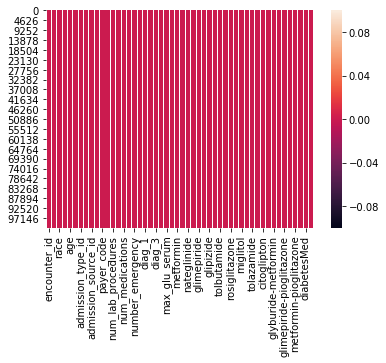

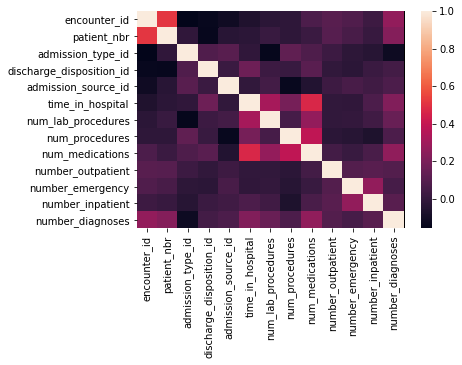

In [4]:
corr = data.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)
plt.show()

In [29]:
#find column names
list(data)
#find the data type of variable
data.dtypes
#find unique variables in each column
data.apply(lambda x: set(x))

race                        {Hispanic, ?, Asian, Other, Caucasian, African...
gender                                        {Unknown/Invalid, Female, Male}
age                         {[90-100), [60-70), [80-90), [50-60), [10-20),...
admission_type_id                                    {1, 2, 3, 4, 5, 6, 7, 8}
discharge_disposition_id    {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
admission_source_id         {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17...
time_in_hospital              {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
payer_code                  {FR, MD, SI, PO, OT, CM, WC, HM, BC, DM, OG, C...
medical_specialty           {Neurology, Pediatrics-InfectiousDiseases, Sur...
num_lab_procedures          {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
num_procedures                                          {0, 1, 2, 3, 4, 5, 6}
num_medications             {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
number_outpatient           {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1

In [ ]:
#drop encounter_id, patient_nbr and weight columns
data = data.drop(['encounter_id', 'patient_nbr', 'weight',
           'examide', 'citoglipton'], axis = 1)

In [34]:
data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,?,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,?,?,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,?,?,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,?,?,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,?,?,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,?,?,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3,1,2,4,?,?,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1,1,7,5,?,?,73,...,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2,1,4,13,?,?,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3,3,4,12,?,InternalMedicine,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [91]:
#find ? values in data
data = data.replace('?', np.nan)

In [93]:
#loops to to change categorical values to dummy variables
unique = data.apply(lambda x: set(x))

In [105]:
#subset the unique series to rows are nominal
nominal = unique[[0,1,2,7,8,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
               35,36,37,38, 39,40,41,42, 43,44]]
#subset the dataset to columns contain nominal values only
list = [0,1,2,7,8,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
               35,36,37,38, 39,40,41,42, 43,44]
nominal.data = data.iloc[:,0,1,2,7,8,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
               35,36,37,38,39,40,41,42, 43,44]

In [95]:
#use for loop to change nominal variables to 
len(list(nominal)) # 31 variables


31

In [101]:
data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,NaN,NaN,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3,1,2,4,NaN,NaN,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1,1,7,5,NaN,NaN,73,...,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2,1,4,13,NaN,NaN,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3,3,4,12,NaN,InternalMedicine,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
